## Байесовские оценки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy.integrate as integrate
from matplotlib.patches import Rectangle 
import scipy.special as sp
import matplotlib.patches as patches
import seaborn as sns
from scipy import optimize
import math
from scipy.stats import bernoulli
%matplotlib inline

In [26]:
teta = 0.6
arr = [5, 10, 20, 50, 100]
rv = bernoulli(teta)

## 6.1. $ X_1, ..., X_n \sim Bern(\theta), \theta \sim R[0, 1]$. Построить график апостериорной плотности θ  а) для выборок размера n = 5, 10, 20, 50, 100;

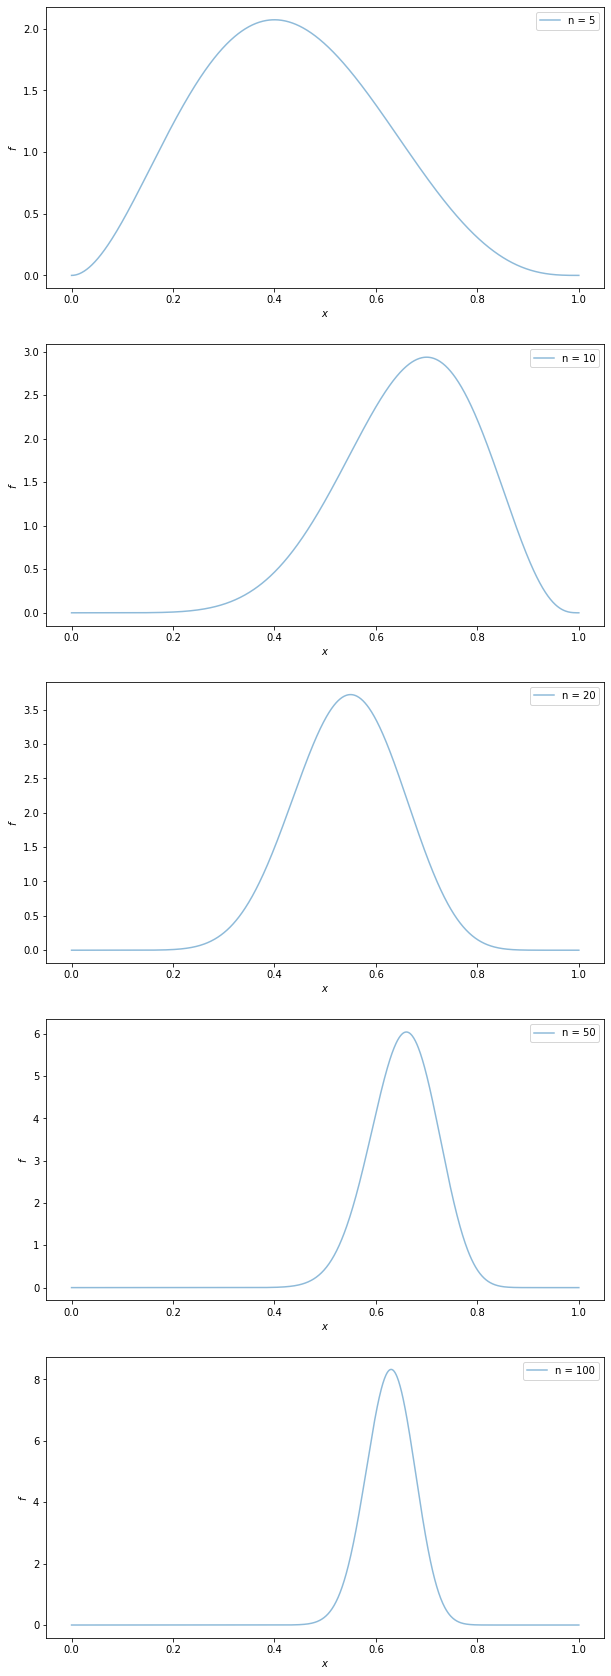

In [41]:
plt.figure(figsize = (10, 30))
k=1
for n in arr:
    plt.subplot(5,1,k)
    k+=1
    x = rv.rvs(n)
    def f(u):
        return u**(np.sum(x))*(1-u)**(len(x)-np.sum(x))/sp.beta(1+np.sum(x), n+1 - np.sum(x))
    xx = np.linspace(0, 1, 1000)
    func  = np.vectorize(f)
    y = func(xx)
    plt.plot(xx, y, label='n = {}'.format(n), alpha=0.5)
    plt.ylabel('$f$')
    plt.xlabel('$x$')
    plt.legend(loc = 'best')
plt.show()

## б) для значения  $\sum \limits_{i=1}^{n} X_i = 9n/10, 99n/100.$

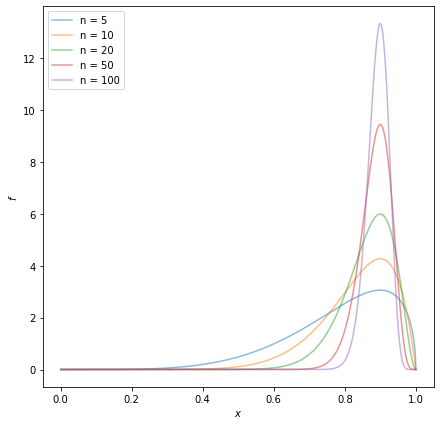

In [42]:
plt.figure(figsize = (7, 7))
for n in arr:
    sumx = 9*n/10
    def f(u):
        return u**(sumx)*(1-u)**(n-sumx)/sp.beta(1+sumx, n+1 - sumx)
    xx = np.linspace(0, 1, 1000)
    func  = np.vectorize(f)
    k+=1
    y = func(xx)
    plt.plot(xx, y, label='n = {}'.format(n), alpha=0.5)
    plt.ylabel('$f$')
    plt.xlabel('$x$')
    plt.legend(loc = 'best')
plt.show()

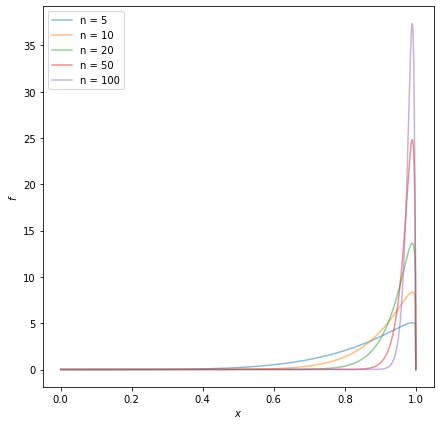

In [44]:
plt.figure(figsize = (7, 7))
for n in arr:
    sumx = 99*n/100
    def f(u):
        return u**(sumx)*(1-u)**(n-sumx)/sp.beta(1+sumx, n+1 - sumx)
    xx = np.linspace(0, 1, 1000)
    func  = np.vectorize(f)
    y = func(xx)
    plt.plot(xx, y, label='n = {}'.format(n), alpha=0.5)
    plt.ylabel('$f$')
    plt.xlabel('$x$')
    plt.legend(loc = 'best')
plt.show()

## 6.2. Сделать то же, что в 6.1 для $X_1, ..., X_n \sim Bern(\theta), \theta \sim Beta(a, b)$

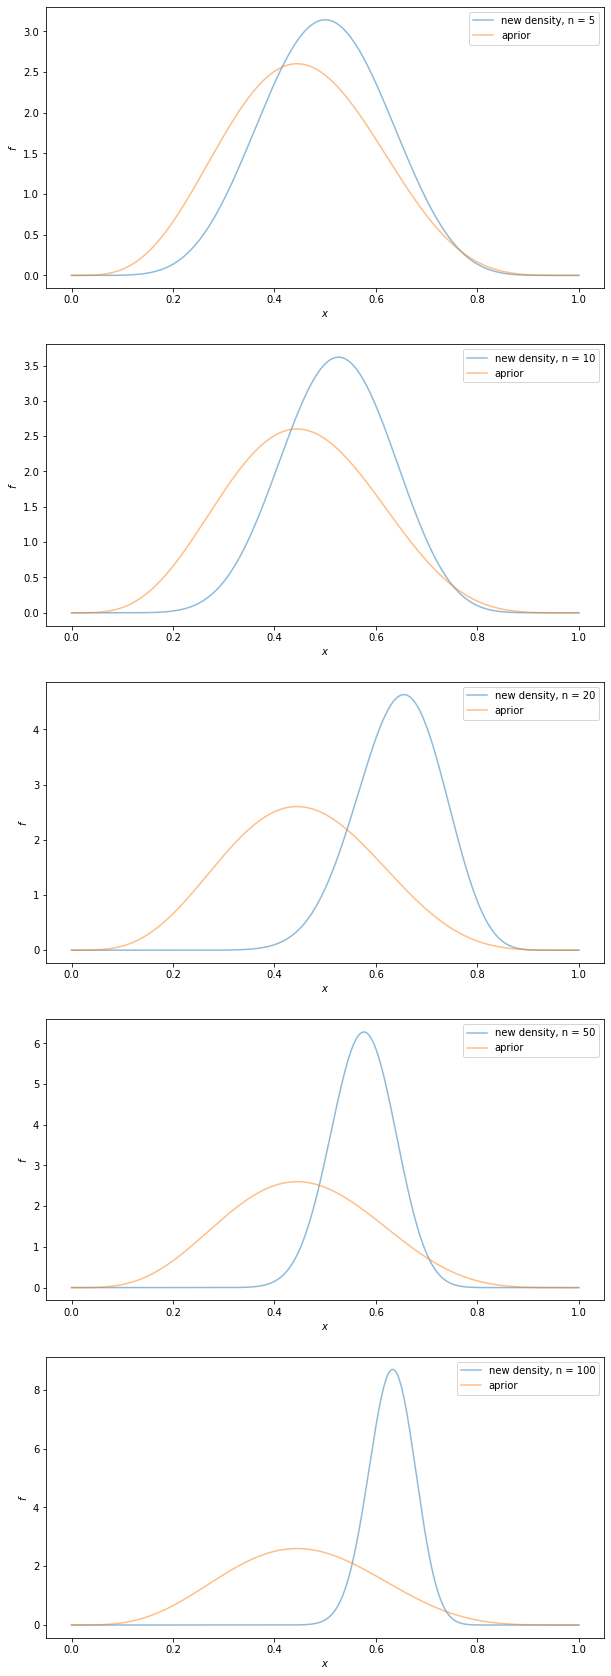

In [46]:
a,b = 5,6
plt.figure(figsize = (10, 30))
k=1
for n in arr:
    x = rv.rvs(n)
    plt.subplot(5,1,k)
    k+=1
    xx = np.linspace(0, 1, 1000)
    y = sts.beta(a+np.sum(x),n+b-np.sum(x)).pdf(xx)
    z = sts.beta(a,b).pdf(xx)
    plt.plot(xx, y, label='new density, n = {}'.format(n), alpha=0.5)
    plt.plot(xx, z, label='aprior', alpha=0.5)
    plt.ylabel('$f$')
    plt.xlabel('$x$')
    plt.legend(loc = 'best')
plt.show()


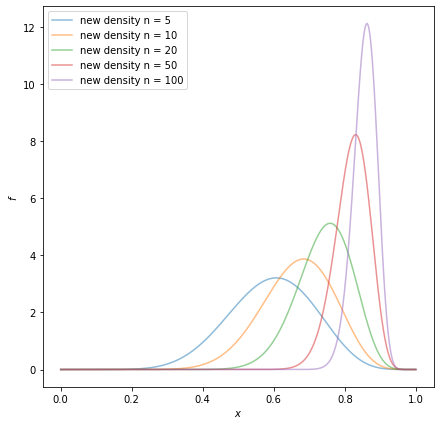

In [48]:
plt.figure(figsize = (7, 7))
for n in arr:
    sumx = 9*n/10
    xx = np.linspace(0, 1, 1000)
    y = sts.beta(a+sumx,n+b-sumx).pdf(xx)
    
    plt.plot(xx, y, label='new density n = {}'.format(n), alpha=0.5)
    plt.ylabel('$f$')
    plt.xlabel('$x$')
    plt.legend(loc = 'best')
plt.show()

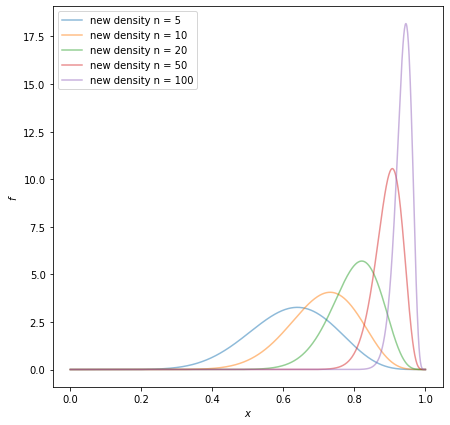

In [50]:
plt.figure(figsize = (7, 7))
for n in arr:
    sumx = 99*n/100
    xx = np.linspace(0, 1, 1000)
    y = sts.beta(a+sumx,n+b-sumx).pdf(xx)
    
    plt.plot(xx, y, label='new density n = {}'.format(n), alpha=0.5)
    plt.ylabel('$f$')
    plt.xlabel('$x$')
    plt.legend(loc = 'best')
plt.show()

## 6.3. $X_1, ..., X_n ∼ Bern(\theta)$
а) Сравнить отклонения оценок $\hat{\theta_1} = \overline{X} \text{ и } \hat{\theta_2} = \overline{X} + (\frac12 - \overline{X})/(1+\sqrt{n})  \text{от} \theta$: генерировать 100 выборок
и оценить вероятность того, что $\hat{\theta_2}$ ближе к $\theta$, чем $\hat{\theta_1}$ (при разных значениях $\theta$.)

delta_teta_1 =  0.03599999999999992
delta_teta_2 =  0.006026311234992865
P =  0.61


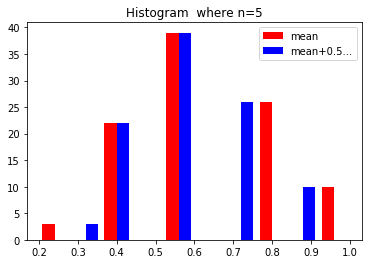

delta_teta_1 =  0.025000000000000022
delta_teta_2 =  0.04301898050140318
P =  0.56


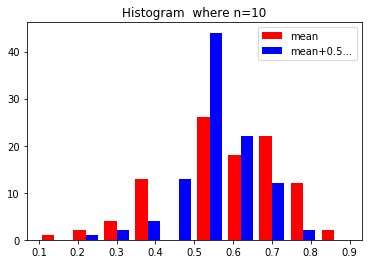

delta_teta_1 =  0.012499999999999956
delta_teta_2 =  0.02849009979276118
P =  0.52


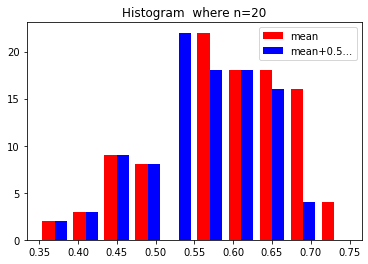

delta_teta_1 =  0.007599999999999829
delta_teta_2 =  0.019048299302374727
P =  0.46


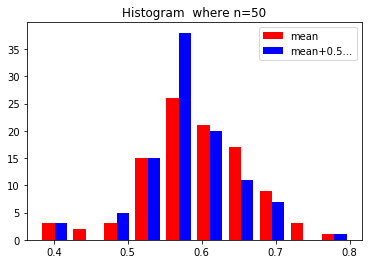

delta_teta_1 =  0.000500000000000056
delta_teta_2 =  0.009545454545454635
P =  0.42


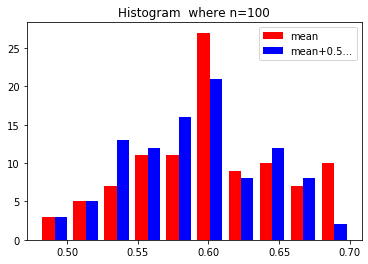

In [10]:
for n in arr:
    
    sample_1 = np.zeros(100)
    sample_2 = np.zeros(100)
    P=0
    for i in range(100):
        x = rv.rvs(n)
        sample_1[i] = np.mean(x)
        sample_2[i] = np.mean(x) + (0.5 - np.mean(x))/(1+n**0.5)
        if(abs(sample_2[i]- teta) <abs(sample_1[i]- teta)):
            P+=1
    plt.hist([sample_1,sample_2],color=['r','b'], label = ['mean','mean+0.5...'])
    plt.title('Histogram  where n={}'.format(n))
    plt.legend()
    print('delta_teta_1 = ', abs(np.mean(sample_1)-teta))
    print('delta_teta_2 = ',abs(np.mean(sample_2)-teta))
    print('P = ', P/100)
    plt.show()
    

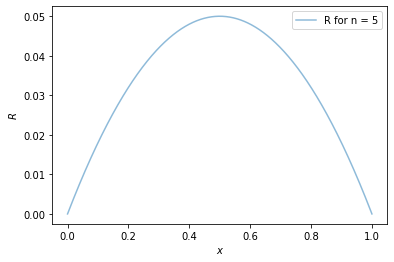

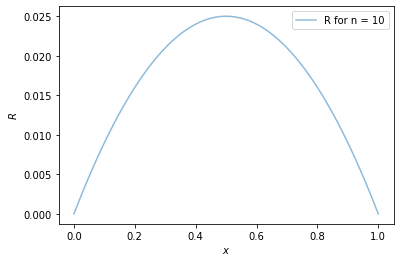

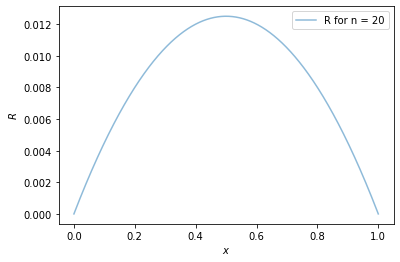

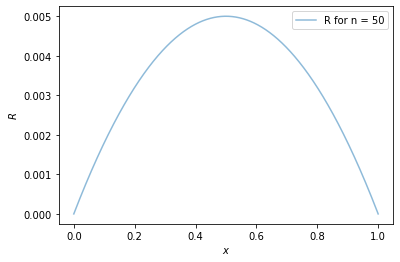

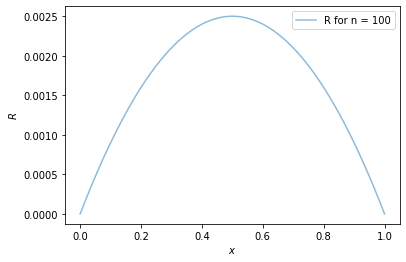

In [11]:
from scipy.special import comb
for n in arr:
    x = np.linspace(0,1,1000)    
    def R1(teta,n):
        result = 0
        for k in range(n+1):
            result += (k/n - teta)**2 * comb(n,k) * teta**(k) *(1-teta)**(n-k)
        return result
    y = list(map(lambda x: R1(x, n),x))

    plt.plot(x, y, label='R for n = {}'.format(n), alpha=0.5)
    plt.ylabel('$R$')
    plt.xlabel('$x$')
    plt.legend(loc = 'best')
    plt.show()

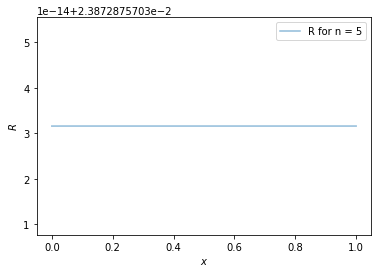

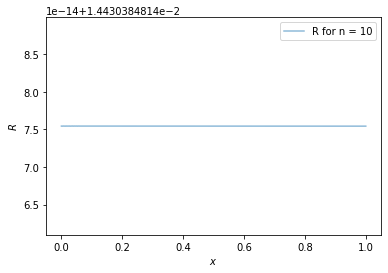

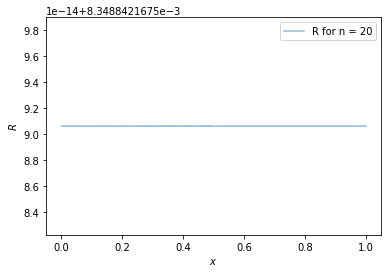

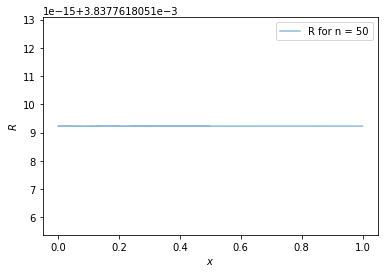

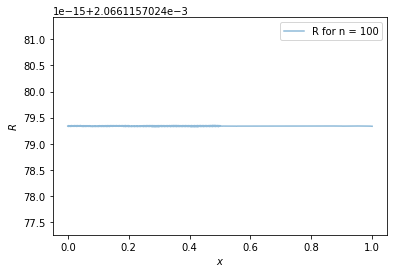

In [14]:
for n in arr:
    x = np.linspace(0,1,1000)    
    def R2(Theta,n):
        result = 0
        for k in range(n+1):
            result += (k/n + (1/2 - k/n)/(1+n**(1/2)) - Theta)**2 * comb(n,k) * Theta**(k) *(1-Theta)**(n-k)
        return result
    y = list(map(lambda x: R2(x, n),x))

    plt.plot(x, y, label='R for n = {}'.format(n), alpha=0.5)
    plt.ylabel('$R$')
    plt.xlabel('$x$')
    plt.legend(loc = 'best')
    plt.show()

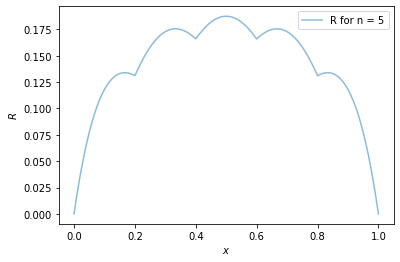

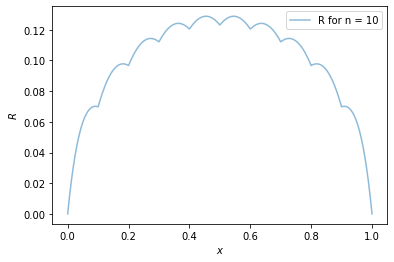

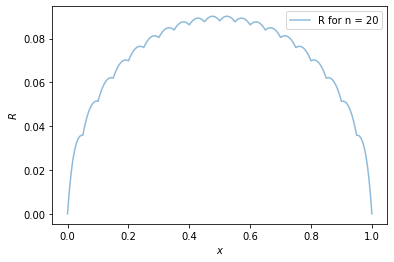

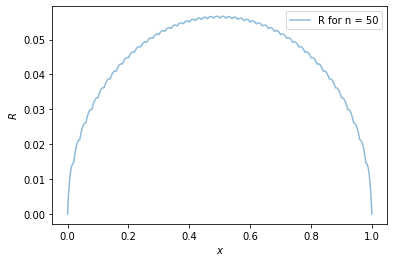

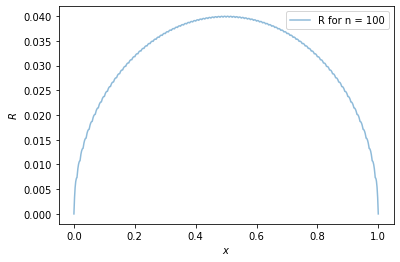

In [16]:
for n in arr:
    x = np.linspace(0,1,1000)    
    def R1(Theta,n):
        result = 0
        for k in range(n+1):
            result += np.abs((k/n - Theta)) * comb(n,k) * Theta**(k) *(1-Theta)**(n-k)
        return result
    y = list(map(lambda x: R1(x, n),x))

    plt.plot(x, y, label='R for n = {}'.format(n), alpha=0.5)
    plt.ylabel('$R$')
    plt.xlabel('$x$')
    plt.legend(loc = 'best')
    plt.show()

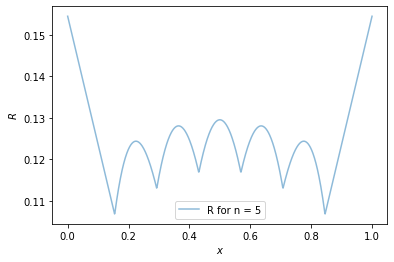

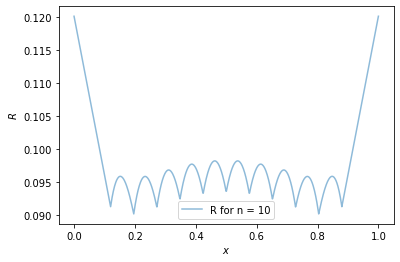

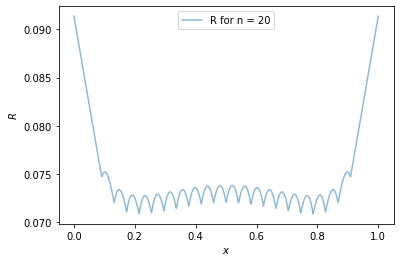

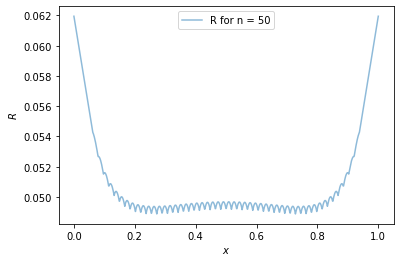

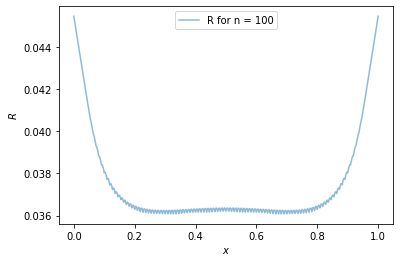

In [18]:
for n in arr:
    x = np.linspace(0,1,1000)    
    def R2(Theta,n):
        result = 0
        for k in range(n+1):
            result += np.abs((k/n + (1/2 - k/n)/(1+n**(1/2)) - Theta)) * comb(n,k) * Theta**(k) *(1-Theta)**(n-k)
        return result
    y = list(map(lambda x: R2(x, n),x))

    plt.plot(x, y, label='R for n = {}'.format(n), alpha=0.5)
    plt.ylabel('$R$')
    plt.xlabel('$x$')
    plt.legend(loc = 'best')
    plt.show()